# Gastos do Município de Capelinha/MG

![Capelinha, Estado de Minas Gerais!](assets/capelinha_mg_overview.jpg "Capelinha/MG")

## Introdução

Este projeto utiliza Python para fazer requisições à [API Minha Receita](https://minhareceita.org), uma iniciativa da sociedade civil que disponibiliza, de forma gratuita e acessível, dados da Receita Federal. O objetivo é obter informações sobre os credores do Município de Capelinha/MG, que foram beneficiados com recursos públicos durante o ano de 2022. Os dados empregados nesta análise foram obtidos a partir do [Portal de Dados Abertos do Tribunal de Contas do Estado de Minas Gerais](https://dadosabertos.tce.mg.gov.br).

## Disclaimer

O storytelling empregado neste estudo foi projetada com o intuito de tornar os dados apresentados e o método de elaboração compreensível para qualquer pessoa, independentemente de sua familiaridade com o assunto. Se você já possui conhecimento técnico em Python e/ou Ciência de Dados, sinta-se à vontade para ignorar quaisquer comentários que possam parecer redundantes ou enfadonhos.

## Importando bibliotecas

In [1]:
# Calcule a arithmetic mean of data. 
from statistics import median

In [2]:
# Pandas: Data manipulation and analysis library.
# https://pandas.pydata.org
try:
    import pandas as pd
except ModuleNotFoundError:
    print('Pandas is not installed, installing now...')
    %pip install pandas
finally:
    import pandas as pd

In [3]:
# Geopandas: Python tools for geographic data.
# https://geopandas.org
try:
    import geopandas as gpd
except ModuleNotFoundError:
    print('Geopandas is not installed, installing now...')
    %pip install geopandas
finally:
    import geopandas as gpd

In [4]:
# Matplotlib: Data visualization library
# https://matplotlib.org
try:
    import matplotlib.pyplot as plt
except ModuleNotFoundError:
    print('Matplotlib is not installed, installing now...')
    %pip install matplotlib
finally:
    import matplotlib.pyplot as plt

## Configurações iniciais

In [5]:
# Configuring Matplotlib to display graphics inline.
%matplotlib inline

In [6]:
# Set default size for graphics.
plt.figure(figsize=(22, 10));

<Figure size 2200x1000 with 0 Axes>

## Configurando as fontes de dados

In [7]:
# Global variables

# Set the seed for the random number generator.
RANDOM_SEED = 42

# Default data directory.
DATA_PATH = r'data/'

# Default data files.
CNPJ = f'{DATA_PATH}output/cnpj_credores_2022.pkl'
QSA = f'{DATA_PATH}output/qsa_credores_2022.pkl'

# Brasil shapefile.
# Shapefile proveniente da Malha Municipal do IBGE.
# https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/15774-malhas.html
SHAPEFILE = f'{DATA_PATH}shapefiles/br_municipios_2022.shp'

## Importando os dados brutos

Para uma visão detalhada e inicial do conjunto de dados, acesse o notebook de análise exploratória: [analise_exploratoria.ipynb](analise_exploratoria.ipynb).

Para compreender a metodologia empregada na criação do dataset, incluindo os detalhes sobre os CNPJs e QSA dos credores, consulte o notebook específico sobre a validação desses dados: [analise_validade_cnpj_credores.ipynb](analise_validade_cnpj_credores.ipynb).

In [8]:
# Importando o dataset contemplando os dados das empresas credoras.
cnpj_df = pd.read_pickle(CNPJ)
print(f'Este dataframe contém dados detalhados de  {cnpj_df.shape[0]} credores, abrangendo um total de {
      cnpj_df.shape[1]} variáveis informativas distintas.')

Este dataframe contém dados detalhados de  583 credores, abrangendo um total de 46 variáveis informativas distintas.


In [9]:
cnpj_df.sample(10, random_state=RANDOM_SEED)

,uf,cep,cnpj,pais,email,porte,bairro,numero,ddd_fax,municipio,...,codigo_natureza_juridica,data_exclusao_do_simples,motivo_situacao_cadastral,ente_federativo_responsavel,identificador_matriz_filial,qualificacao_do_responsavel,descricao_situacao_cadastral,descricao_tipo_de_logradouro,descricao_motivo_situacao_cadastral,descricao_identificador_matriz_filial
355,MG,36328000,27183604000177,None,None,EMPRESA DE PEQUENO PORTE,CENTRO,33,,SANTA CRUZ DE MINAS,...,2062,2022-10-31,0,,1,49,ATIVA,RUA,SEM MOTIVO,MATRIZ
407,RS,95320000,20963380000177,None,None,DEMAIS,CARAVAGIO,50,,NOVA PRATA,...,2062,None,0,,1,49,ATIVA,ESTRADA,SEM MOTIVO,MATRIZ
90,MG,39680000,13749564000173,None,None,MICRO EMPRESA,MARIA LUCIA,215,,CAPELINHA,...,2135,None,0,,1,50,ATIVA,RUA,SEM MOTIVO,MATRIZ
402,SC,89202212,17400505000146,None,None,DEMAIS,BUCAREIN,31,,JOINVILLE,...,2062,None,0,,1,49,ATIVA,RUA,SEM MOTIVO,MATRIZ
268,MG,39680000,34364692000179,None,None,MICRO EMPRESA,PLANALTO,622,,CAPELINHA,...,2062,2023-12-31,0,,1,49,ATIVA,RUA,SEM MOTIVO,MATRIZ
356,MG,30170917,30511391000170,None,None,DEMAIS,SANTO AGOSTINHO,1600,,BELO HORIZONTE,...,2143,None,0,,1,16,ATIVA,AVENIDA,SEM MOTIVO,MATRIZ
110,MG,39680000,00478688000110,None,None,MICRO EMPRESA,CENTRO,480,3335161806,CAPELINHA,...,2135,None,0,,1,50,ATIVA,RUA,SEM MOTIVO,MATRIZ
488,MG,39680000,22019307000177,None,None,DEMAIS,VILA OPERARIA,913,,CAPELINHA,...,3999,None,0,,1,16,ATIVA,RUA,SEM MOTIVO,MATRIZ
132,MG,39680000,14323476000178,None,None,EMPRESA DE PEQUENO PORTE,CENTRO,60,3335164216,CAPELINHA,...,2062,None,0,,1,49,ATIVA,ALAMEDA,SEM MOTIVO,MATRIZ
497,MG,39680000,71368690000184,None,None,MICRO EMPRESA,PLANALTO,1095,,CAPELINHA,...,2062,None,0,,1,49,ATIVA,,SEM MOTIVO,MATRIZ


In [10]:
# Importando o dataset contendo os dados dos sócios das empresas credoras.
qsa_df = pd.read_pickle(QSA)
print(f'Este dataframe compreende  {qsa_df.shape[0]} registros de sócios, distribuídos em {
      qsa_df.shape[1]} variáveis informativas distintas.')

Este dataframe compreende  1053 registros de sócios, distribuídos em 15 variáveis informativas distintas.


In [11]:
qsa_df.sample(10, random_state=RANDOM_SEED)

,cnpj,pais,nome_socio,codigo_pais,faixa_etaria,cnpj_cpf_do_socio,qualificacao_socio,codigo_faixa_etaria,data_entrada_sociedade,identificador_de_socio,cpf_representante_legal,nome_representante_legal,codigo_qualificacao_socio,qualificacao_representante_legal,codigo_qualificacao_representante_legal
394,25191289000102,None,ADRIANO SANTOS,NaN,Entre 41 a 50 anos,***329418**,Sócio-Administrador,5.0,2013-08-09,2.0,***000000**,,49.0,Não informada,0.0
96,10662871000124,None,LIDIA MARTINS DOS SANTOS,NaN,Entre 41 a 50 anos,***948786**,Sócio-Administrador,5.0,2022-10-18,2.0,***000000**,,49.0,Não informada,0.0
972,02537890000109,None,JOSE ALDO CORDEIRO DE SIQUEIRA,NaN,Entre 41 a 50 anos,***997246**,Sócio-Administrador,5.0,1998-05-19,2.0,***000000**,,49.0,Não informada,0.0
1052,11002975000175,None,LUCIANO COELHO ANDRADE,NaN,Entre 41 a 50 anos,***207126**,Sócio-Administrador,5.0,2009-07-30,2.0,***000000**,,49.0,Não informada,0.0
59,03691012000106,None,ANA DE FATIMA GOMES MARINHO,NaN,Entre 61 a 70 anos,***968286**,Sócio,7.0,2018-10-05,2.0,***000000**,,22.0,Não informada,0.0
312,31022161000100,None,RICARDO VIEIRA LIMA,NaN,Entre 41 a 50 anos,***436466**,Sócio-Administrador,5.0,2018-07-25,2.0,***000000**,,49.0,Não informada,0.0
256,00000000039640,None,JOSE RICARDO SASSERON,NaN,Entre 61 a 70 anos,***404558**,Diretor,7.0,2023-03-22,2.0,***000000**,,10.0,Não informada,0.0
333,24361188000161,None,WARLEY LUCIANO COSTA GOMES,NaN,Entre 31 a 40 anos,***068866**,Sócio-Administrador,4.0,2016-03-11,2.0,***000000**,,49.0,Não informada,0.0
859,60746948000112,None,MARCELO SARNO PASQUINI,NaN,Entre 41 a 50 anos,***318958**,Diretor,5.0,2023-02-28,2.0,***000000**,,10.0,Não informada,0.0
141,02359316000108,None,FRANCO ANTONIO CORDEIRO NEVES,NaN,Entre 41 a 50 anos,***172926**,Sócio,5.0,2008-08-01,2.0,***000000**,,22.0,Não informada,0.0


In [12]:
# Carregando o shapefile do Brasil.
brasil_shapefile = gpd.read_file(SHAPEFILE, mode='r', encoding='utf-8')
brasil_shapefile.sample(5, random_state=RANDOM_SEED)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
3245,3304755,São Francisco de Itabapoana,RJ,1118.037,"MULTIPOLYGON (((-41.07135 -21.50458, -41.07138..."
944,2304269,Deputado Irapuan Pinheiro,CE,471.134,"POLYGON ((-39.22139 -5.77450, -39.22089 -5.775..."
1044,2311702,Reriutaba,CE,372.949,"POLYGON ((-40.55382 -4.04671, -40.51269 -4.046..."
2484,3121704,Diogo de Vasconcelos,MG,165.091,"POLYGON ((-43.07981 -20.48142, -43.07977 -20.4..."
812,2207355,Pajeú do Piauí,PI,986.961,"POLYGON ((-42.93596 -8.06286, -42.96525 -8.046..."


In [13]:
# Convertendo as colunas de data para o tipo datetime.
# Filtrando as colunas que começam com 'data_'.
colunas_tipo_data = [col for col in cnpj_df.columns if col.startswith('data_')]
cnpj_df[colunas_tipo_data] = cnpj_df[colunas_tipo_data].apply(lambda col: pd.to_datetime(col, errors='coerce'))

In [14]:
# Convertendo as colunas que contem apenas texto para o tipo string.
colunas_tipo_string = [col for col in cnpj_df.columns if cnpj_df[col].dtype == 'O']
cnpj_df[colunas_tipo_string] = cnpj_df[colunas_tipo_string].astype('string')

In [15]:
# Os tipos de dados das colunas do dataframe.
cnpj_df.dtypes

uf                                       string[python]
cep                                      string[python]
cnpj                                     string[python]
pais                                     string[python]
email                                    string[python]
porte                                    string[python]
bairro                                   string[python]
numero                                   string[python]
ddd_fax                                  string[python]
municipio                                string[python]
logradouro                               string[python]
cnae_fiscal                                       int64
codigo_pais                              string[python]
complemento                              string[python]
codigo_porte                                      int64
razao_social                             string[python]
nome_fantasia                            string[python]
capital_social                                  

## Visualização dos Dados (Data Visualization)
Vamos explorar e destacar a localização geográfica de Capelinha, em Minas Gerais, para entender sua posição e contexto dentro do vasto território brasileiro. Esta visualização nos proporcionará uma perspectiva clara de como Capelinha se integra no mapa do Brasil, realçando suas conexões regionais e a importância estratégica que ocupa no cenário nacional.

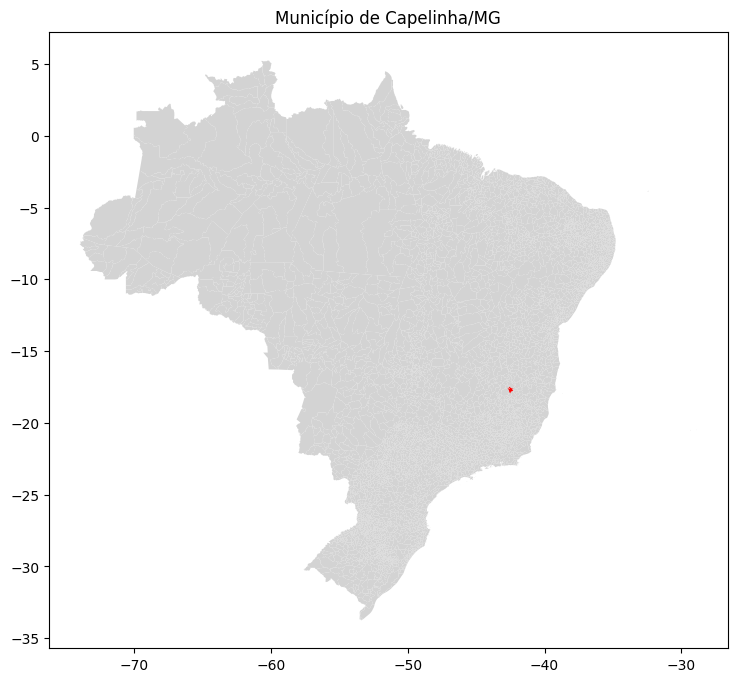

In [16]:
# Filtrando apenas o município de Capelinha.
capelinha = brasil_shapefile.query("NM_MUN == 'Capelinha'")

# Plotando o mapa do Brasil.
fig, ax = plt.subplots(figsize=(18, 8))
brasil_shapefile.plot(ax=ax, color='lightgrey')

# Destacando o município de Capelinha.
capelinha.plot(ax=ax, color='red')

# Ajustando títulos ou outras configurações do gráfico, se necessário
plt.title('Município de Capelinha/MG')
plt.show()

### Onde as empresas estão localizadas? 

Agora que sabemos onde o município de Capelinha, em Minas Gerais, está localizado, vamos entender em quais municípios estão situadas as empresas que receberam algum recurso

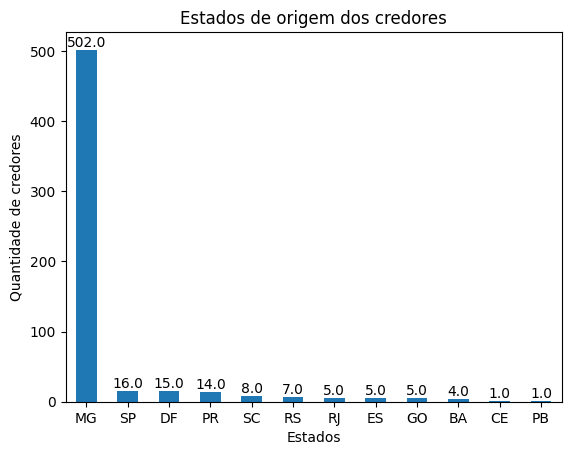

In [17]:
# Filtrando o estado de origem dos credores.
estados_credores = cnpj_df['uf'].value_counts().plot(kind='bar',
                                                     title='Estados de origem dos credores',
                                                     xlabel='Estados',
                                                     rot=0,
                                                     ylabel='Quantidade de credores')

# Adicionando em cada barra o label com a quantidade de credores.
for patch in estados_credores.patches:
    estados_credores.annotate(str(patch.get_height()),
                              (patch.get_x() + patch.get_width() /
                               2, patch.get_height()),
                              ha='center',
                              va='bottom')

plt.show()

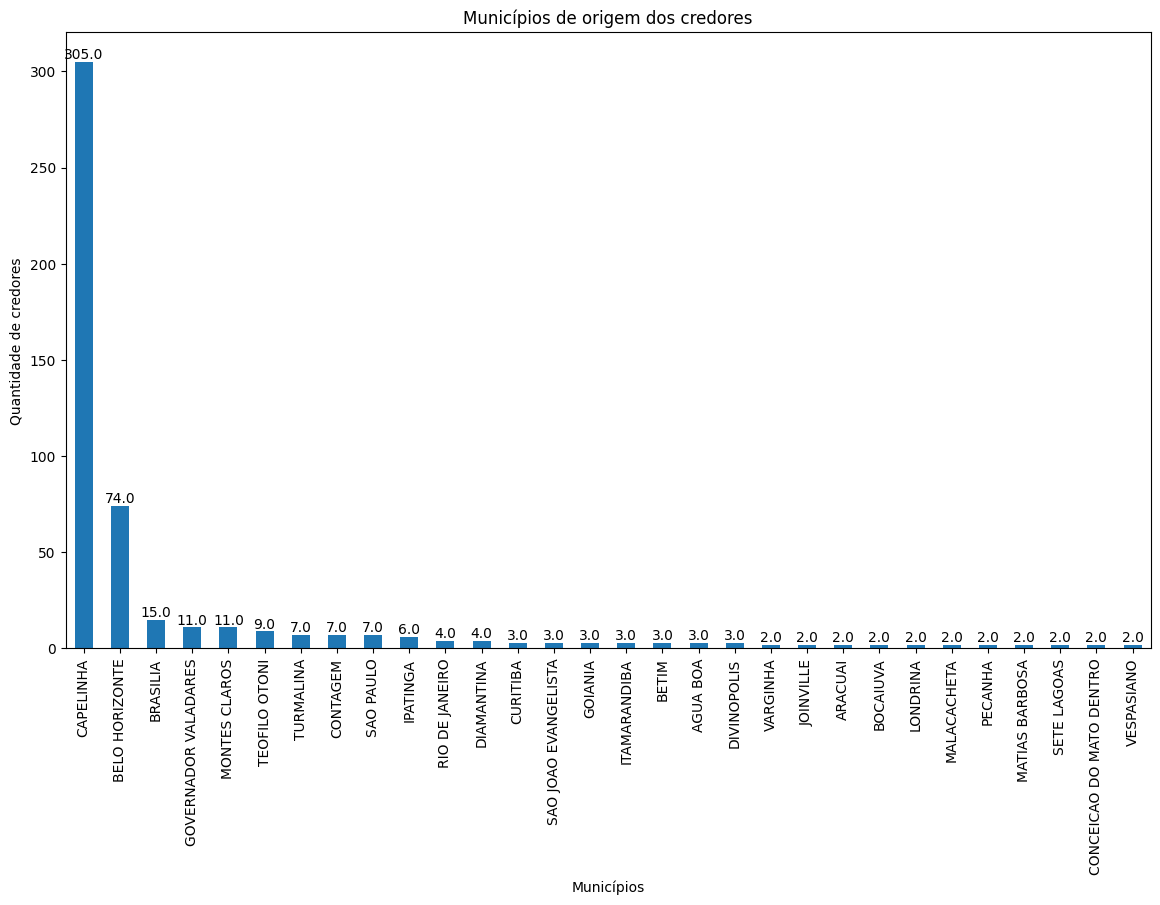

In [18]:
# Os 30 municípios com maior quantidade de credores.
municipio_credores_plot = cnpj_df['municipio'].value_counts()[:30].plot(kind='bar',
                                                                        figsize=(14, 8),
                                                                        title='Municípios de origem dos credores',
                                                                        xlabel='Municípios',
                                                                        ylabel='Quantidade de credores')

# Para cada coluna, adiciona o label com a quantidade de credores.
for patch in municipio_credores_plot.patches:
    municipio_credores_plot.annotate(str(patch.get_height()),
                                     (patch.get_x() + patch.get_width() /
                                      2, patch.get_height()),
                                     ha='center',
                                     va='bottom')

plt.show()

Como era esperado, a maior quantidade de credores está localizada no próprio município de Capelinha. Entretanto, existem alguns credores localizados em municípios bem distantes. Vamos visualizar esta distribuição de forma gráfica.

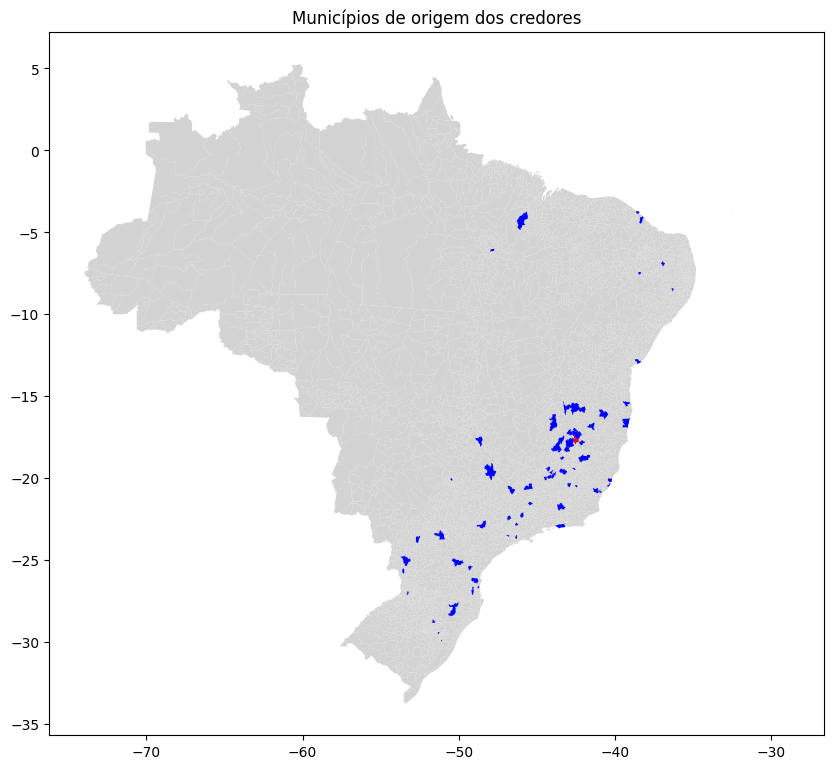

In [19]:
# Filtrando os municípios de origem dos credores.
municipio_credores_plot = cnpj_df['municipio'].unique()

# Garantindo que o nome dos municípios esteja em caixa alta.
brasil_shapefile['NM_MUN'] = brasil_shapefile['NM_MUN'].str.upper()

# Filtrando apenas as informações dos municípios de origem dos credores.
coordenas_municipios_credores = brasil_shapefile[brasil_shapefile['NM_MUN'].isin(municipio_credores_plot)]

# Criando a visualização.
fig, ax = plt.subplots(figsize=(10, 10))
# Plotando o mapa do Brasil.
brasil_shapefile.plot(ax=ax, color='lightgrey')
# Destacando os municípios de origem dos credores.
coordenas_municipios_credores.plot(ax=ax, color='blue')
# Destacando o município de Capelinha.
capelinha.plot(ax=ax, color='red')

plt.title('Municípios de origem dos credores')
plt.show()

É interessante notar que temos credores distribuídos por praticamente todo o país, com exceção da região Norte. Há uma presença significativa de credores bastante distantes da região geográfica do município de Capelinha.

## A situação de todos os credores junto à Receita Federal é 'ativa'?

In [20]:
# Entendendo a situação cadastral das empresas credoras.
cnpj_df['descricao_situacao_cadastral'].value_counts()

descricao_situacao_cadastral
ATIVA      573
BAIXADA     10
Name: count, dtype: Int64

In [21]:
# Filtrando os credores que estão com a situação cadastral baixada.
cnpj_df.query("descricao_situacao_cadastral == 'BAIXADA'")[['descricao_motivo_situacao_cadastral',
                                                            'descricao_identificador_matriz_filial']
                                                            ].value_counts()

descricao_motivo_situacao_cadastral              descricao_identificador_matriz_filial
EXTINCAO POR ENCERRAMENTO LIQUIDACAO VOLUNTARIA  MATRIZ                                   8
INCORPORACAO                                     FILIAL                                   1
                                                 MATRIZ                                   1
Name: count, dtype: int64

In [22]:
# Quais são os credores com a situação cadastral encerrada por liquidação voluntária?
cnpj_df.query("descricao_motivo_situacao_cadastral == 'EXTINCAO POR ENCERRAMENTO LIQUIDACAO VOLUNTARIA'")[['cnpj',
                                                                                                           'uf',
                                                                                                           'municipio',
                                                                                                           'razao_social',
                                                                                                           'data_inicio_atividade',
                                                                                                           'data_situacao_cadastral']]

,cnpj,uf,municipio,razao_social,data_inicio_atividade,data_situacao_cadastral
4,40222993000160,MG,CAPELINHA,SO GESSO CAPELINHA LTDA,2020-12-28,2023-09-12
85,29563618000141,MG,CAPELINHA,REMY SOARES DE JESUS 06758540677,2018-01-30,2023-07-07
88,29458776000131,MG,CAPELINHA,VALMIR ROCHA FERNANDES 06479571673,2018-01-17,2023-06-19
187,30128056000197,MG,CAPELINHA,ALVES FERREIRA BATERIAS LTDA,2018-04-06,2023-05-19
206,38427451000182,ES,CACHOEIRO DE ITAPEMIRIM,TREM BARATO ELETROMOVEIS E SERVICOS ADMINISTRA...,2020-09-11,2023-04-20
258,37537770000188,MG,CAPELINHA,SANTOS E PEIXOTO SOLUCOES EM SAUDE LTDA,2020-06-26,2022-08-02
348,34737860000124,MG,CAPELINHA,FABIO SERGIO RODRIGUES PEREIRA 15952462669,2019-09-02,2023-01-13
432,37668378000178,MG,CAPELINHA,AGENCIA 7 LTDA,2020-07-09,2023-10-11


In [23]:
# Quais são os credores com a situação cadastral encerrada por incorporação?
cnpj_df.query("descricao_motivo_situacao_cadastral == 'INCORPORACAO'")[['cnpj',
                                                                        'uf',
                                                                        'municipio',
                                                                        'razao_social',
                                                                        'data_inicio_atividade',
                                                                        'data_situacao_cadastral']]

,cnpj,uf,municipio,razao_social,data_inicio_atividade,data_situacao_cadastral
290,33530486013883,MG,BELO HORIZONTE,EMPRESA BRASILEIRA DE TELECOMUNICACOES S A EMB...,1974-05-22,2014-12-31
425,33700394000140,SP,SAO PAULO,UNIBANCO-UNIAO DE BANCOS BRASILEIROS S.A.,1967-08-31,2014-07-31


## Qual o porte e a natureza jurídica dos credores?

In [24]:
# Entendendo o porte e natureza jurídica das empresas credoras.
cnpj_df[['porte', 'natureza_juridica']].value_counts()

porte                     natureza_juridica                                                    
MICRO EMPRESA             Sociedade Empresária Limitada                                            181
EMPRESA DE PEQUENO PORTE  Sociedade Empresária Limitada                                            131
MICRO EMPRESA             Empresário (Individual)                                                   99
DEMAIS                    Sociedade Empresária Limitada                                             58
                          Associação Privada                                                        29
                          Sociedade Anônima Fechada                                                 15
EMPRESA DE PEQUENO PORTE  Empresário (Individual)                                                   10
DEMAIS                    Autarquia Federal                                                          8
                          Sociedade Anônima Aberta                              

O dataset oferece uma análise detalhada da distribuição de empresas por porte e natureza jurídica. No quesito porte, a categoria "MICRO EMPRESA" se destaca como a mais prevalente, somando 284 registros ao considerar todas as naturezas jurídicas a ela associadas. Em relação à natureza jurídica, a "Sociedade Empresária Limitada" emerge como a mais frequente, acumulando 370 registros no total.

Dentro da categoria de Micro Empresas, é notável a presença significativa de 99 Empresários Individuais. Por outro lado, na categoria "Demais", a Sociedade Empresária Limitada ainda apresenta uma forte presença com 58 registros, seguida por Associações Privadas e Sociedades Anônimas Fechadas.

Curiosamente, a categoria "Demais" engloba uma gama mais ampla de naturezas jurídicas, incluindo entidades governamentais como Autarquias Federais e Órgãos Públicos do Poder Executivo Federal. Este segmento também compreende outras formas jurídicas, como Empresas Públicas e Fundações Privadas, refletindo a diversidade do panorama empresarial representado no dataset.

## Os credores são empresas com um tempo de constituição mais longo?

In [25]:
tempo_constituicao = [2023 - ano for ano in sorted(cnpj_df['data_inicio_atividade'].unique().year)]

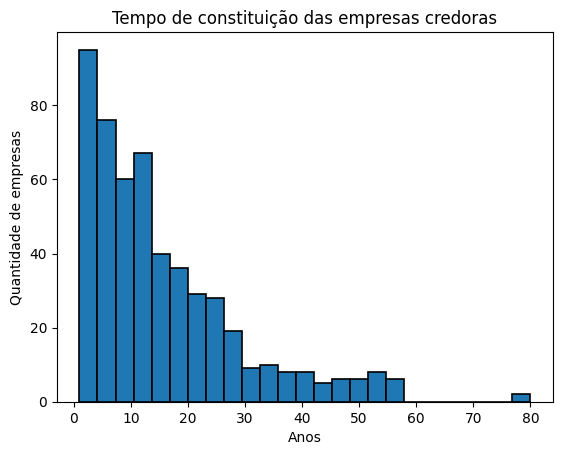

In [26]:
plt.hist(tempo_constituicao, bins=25, edgecolor='black', linewidth=1.2)
plt.title('Tempo de constituição das empresas credoras')
plt.xlabel('Anos')
plt.ylabel('Quantidade de empresas')
plt.show()

Existe uma grande concentração de empresas com pouco tempo de constituição. Vamos examinar mais de perto esta situação.

In [27]:
print(f'Existem {cnpj_df.query("data_inicio_atividade > '2020-01-01'").shape[0]} empresas cuja data de constituição é posterior a 2020.')
print(f'Em média, as empresas credoras possuem {round(median(tempo_constituicao))} anos de existência desde a sua constituição.')
print(f'A empresa mais antiga tem {max(tempo_constituicao)} anos de história, enquanto a mais recente foi constituída há apenas {min(tempo_constituicao)} ano')

Existem 79 empresas cuja data de constituição é posterior a 2020.
Em média, as empresas credoras possuem 12 anos de existência desde a sua constituição.
A empresa mais antiga tem 80 anos de história, enquanto a mais recente foi constituída há apenas 1 ano


In [28]:
# Empresas constituídas durante o ano de 2022.
cnpj_df.query("data_inicio_atividade > '2022-01-01'")[['cnpj',
                                                       'uf',
                                                       'municipio',
                                                       'razao_social',
                                                       'data_inicio_atividade']].sort_values(by='data_inicio_atividade')

,cnpj,uf,municipio,razao_social,data_inicio_atividade
262,44945410000180,MG,CAPELINHA,EMPREENDIMENTOS E CONSTRUCOES ESPLANADA LTDA,2022-01-20
518,45108167000109,MG,BELO HORIZONTE,A&P DOKTERS,2022-01-28
500,45152649000166,MG,CAPELINHA,JACKSON RODRIGUES DOS SANTOS 35349098870,2022-02-04
159,45244152000178,MG,GOVERNADOR VALADARES,TECKSAT RASTREAMENTO & TELEMETRIA LTDA,2022-02-10
225,45249262000122,MG,SAO SEBASTIAO DO MARANHAO,JOAO MARCOS VIEIRA FROIS 14321461650,2022-02-11
390,45652764000108,MG,CAPELINHA,45.652.764 RYAN REYNALD GOMES MACIEL,2022-03-15
64,45729395000104,MG,CAPELINHA,45.729.395 SARA LOPES DO NASCIMENTO,2022-03-21
80,45830075000138,MG,CAPELINHA,MARCENARIA BOA ESPERANCA LTDA,2022-03-29
81,45936672000141,MG,CAPELINHA,JM MARMORARIA LTDA,2022-04-06
360,46053068000130,MG,CAPELINHA,BARCELOS E VIEIRA EMPREENDIMENTOS IMOBILIARIOS...,2022-04-18


In [29]:
# Empresas constituídas durante o ano de 2021.
cnpj_df.query("'2021-01-01' < data_inicio_atividade < '2022-01-01'")[['cnpj',
                                                       'uf',
                                                       'municipio',
                                                       'razao_social',
                                                       'data_inicio_atividade']].sort_values(by='data_inicio_atividade')

,cnpj,uf,municipio,razao_social,data_inicio_atividade
298,40314752000141,MG,CAPELINHA,EUGENIO PEREIRA CORDEIRO,2021-01-08
94,40505858000122,MG,CAPELINHA,DIESELTEC TECNOLOGIA AUTOMOTIVA LTDA,2021-01-21
95,40505858000122,MG,CAPELINHA,DIESELTEC TECNOLOGIA AUTOMOTIVA LTDA,2021-01-21
435,40615480000110,MG,CAPELINHA,PRODUCAO E COMERCIO EUCAPLANT LTDA,2021-01-28
136,40738368000176,SC,LAGES,GAMBA CONEXOES COMERCIO ATACADISTA DE ALIMENTO...,2021-02-05
135,40766429000109,MG,CAPELINHA,G3 SISTEMAS & TECNOLOGIA LTDA,2021-02-08
436,40803709000140,MG,CAPELINHA,ULTRA GUINCHO E LOCACOES LTDA,2021-02-10
462,41107986000180,MG,BRASILIA DE MINAS,SOLUCAO CAPACITACAO E TREINAMENTO LTDA,2021-03-05
264,41105673000193,MG,CAPELINHA,LUIS GUSTAVO ALVES MOREIRA 14696349616 LTDA,2021-03-05
73,41354686000104,MG,CAPELINHA,41.354.686 ALAERTE PEREIRA DE SA,2021-03-25


In [30]:
# Empresas constituídas durante o ano de 2020.
cnpj_df.query("'2020-01-01' < data_inicio_atividade < '2021-01-01'")[['cnpj',
                                                       'uf',
                                                       'municipio',
                                                       'razao_social',
                                                       'data_inicio_atividade']].sort_values(by='data_inicio_atividade')

,cnpj,uf,municipio,razao_social,data_inicio_atividade
431,36088019000189,MG,MONTES CLAROS,K.R.C.J SERVICOS MEDICOS LTDA,2020-01-22
2,36169783000189,MG,CAPELINHA,CAPELINHA EXTINTORES LTDA,2020-01-29
458,36181473000180,PR,CURITIBA,BIDDEN COMERCIAL LTDA.,2020-01-29
522,36244129000192,MG,CAPELINHA,AVANTMED SERVICOS MEDICOS LTDA,2020-02-04
257,36276204000105,MG,VARGINHA,L.B. REIS SERVICOS MEDICOS LTDA,2020-02-06
51,36487961000110,MG,CAPELINHA,ELETRO MAIS MATERIAL ELETRICO LTDA,2020-02-27
142,36503433000107,MG,CAPELINHA,REAL CAP LTDA,2020-02-28
523,36566392000106,MG,BELO HORIZONTE,PAULA CLARKE SERVICOS MEDICOS LTDA,2020-03-05
408,36839986000135,MG,CAPELINHA,36.839.986 ANDERSON MACHADO DE SOUSA,2020-04-01
26,36961384000156,MG,BELO HORIZONTE,F&M REPRESENTACOES LTDA,2020-04-18


## Como está distribuída a faixa etária dos sócios das empresas?

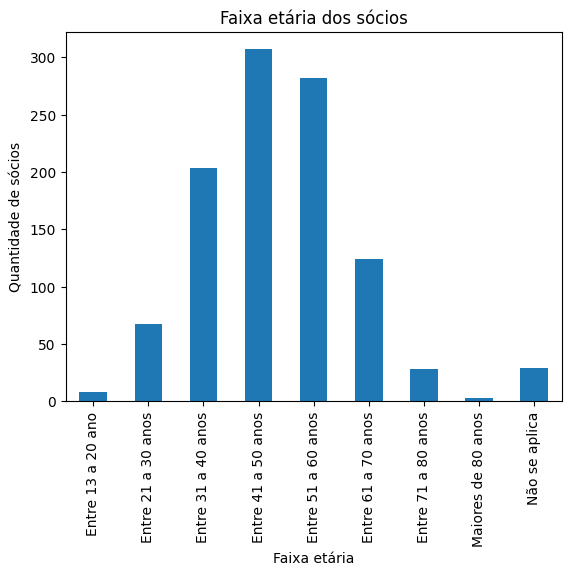

In [31]:
qsa_df['faixa_etaria'].value_counts().sort_index().plot(kind='bar',
                                                        title='Faixa etária dos sócios',
                                                        xlabel='Faixa etária',
                                                        ylabel='Quantidade de sócios');